In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("s3://germancredit2/datos/train/train.csv")
test = pd.read_csv("s3://germancredit2/datos/train/test.csv")

In [3]:
numeric_pipeline = Pipeline(
    [
     ('Imputacion con la media', SimpleImputer(strategy = 'mean')),
     ('Escalado minmax',MinMaxScaler())
        
    ]
)

In [4]:

#Sex, Purpose,Categoric_python,Checking account
categorical_pipeline = Pipeline(
    [
     ('Imputacion con la moda', SimpleImputer(strategy = 'most_frequent')),
     ('Codificacion',OneHotEncoder(sparse = False,drop='first'))
        
    ]
)

In [5]:
column_transformer = ColumnTransformer(
[
    ("numeric pipeline",numeric_pipeline,[0,1,2]),
    ("categorical pipeline",categorical_pipeline,[3,4,5])
]
)

In [6]:
features = [["Age","Credit amount","Duration","Sex","Purpose","House"]]

### Selección de caracteristicas

In [7]:
train = train.dropna()

In [9]:
X_train = train.drop(["Risk","Unnamed: 0"],axis=1)
y_train = train["Risk"]

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [11]:
y_train.size

361

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [14]:
X_train = pd.get_dummies(X_train)

In [15]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,36,1,4241,24,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,35,3,6948,36,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,24,2,2145,36,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10,30,2,639,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,26,2,4788,48,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
693,36,2,1275,24,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
694,37,1,1274,12,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model.feature_importances_

array([0.11596355, 0.04664217, 0.32452608, 0.19849953, 0.02809681,
       0.        , 0.02620219, 0.0056199 , 0.02584371, 0.02335862,
       0.02145781, 0.02800838, 0.01049048, 0.01943031, 0.02472757,
       0.        , 0.        , 0.05416721, 0.        , 0.00760165,
       0.02155634, 0.00953113, 0.00827658, 0.        ])

In [23]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

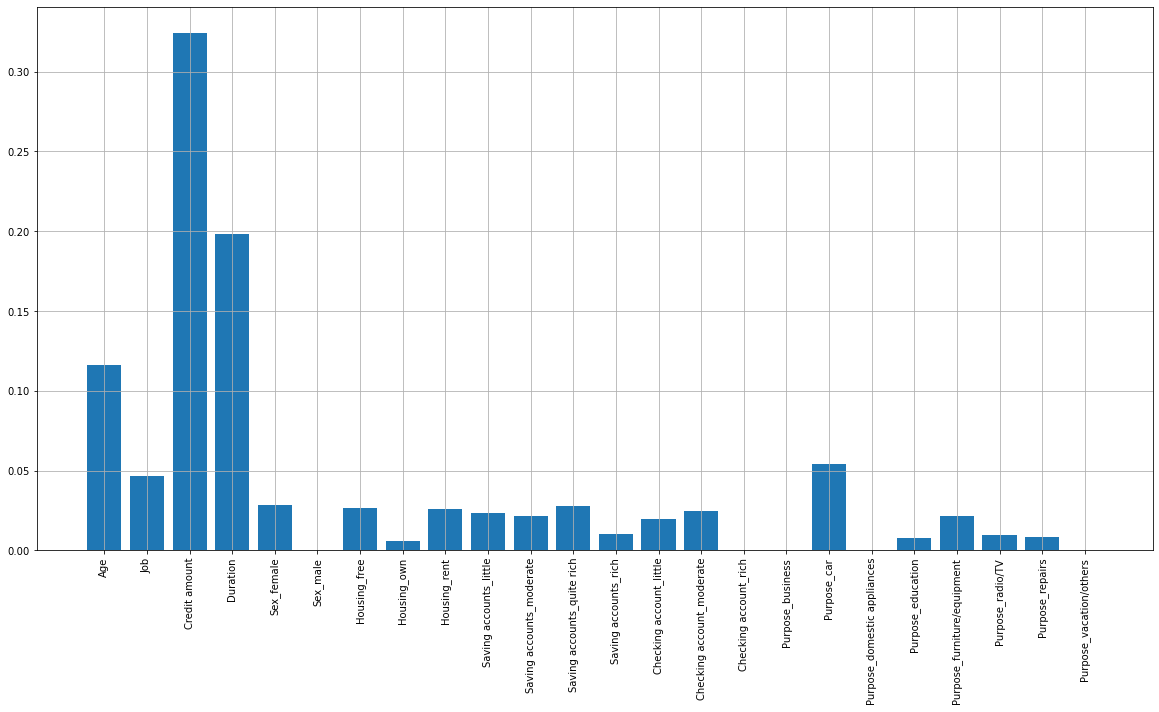

In [34]:
plt.figure(figsize = (20,10))
plt.bar(x=X_train.columns,height=model.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [39]:
np.argsort(model.feature_importances_)[::-1]

array([ 2,  3,  0, 17,  1,  4, 11,  6,  8, 14,  9, 20, 10, 13, 12, 21, 22,
       19,  7, 16, 18,  5, 15, 23])

In [44]:
order_columns = X_train.columns[np.argsort(model.feature_importances_)[::-1]]

In [45]:
order_importance = np.sort(model.feature_importances_)[::-1]

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(x=X_train.columns,height=model.feature_importances_)
plt.xticks(rotation=90)
plt.grid()
plt.show()